Write a Python program to download and preprocess a text corpus, then train word embed-dings using Continuous Bag of Words (CBOW) and Skip-gram models with the Word2Vec algorithm. Additionally, explore other embedding techniques such as GloVe or FastText.
After training the embeddings, use PCA and t-SNE to reduce their dimensionality and visualize the word relationships in a 2D or 3D space. Compare the differences in word clusters and interpret how CBOW, Skip-gram, and other embeddings capture semantic relationships.

stopwords already present.
punkt tokenizer already present.


[nltk_data] Downloading package reuters to /content/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /content/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /content/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Error: reuters not found.
Error: punkt not found.
stopwords successfully loaded.
Error: wordnet not found.
Error: punkt_tab not found.
Current NLTK paths: ['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/content/nltk_data', '/content/nltk_data', '/content/nltk_data', '/content/nltk_data']


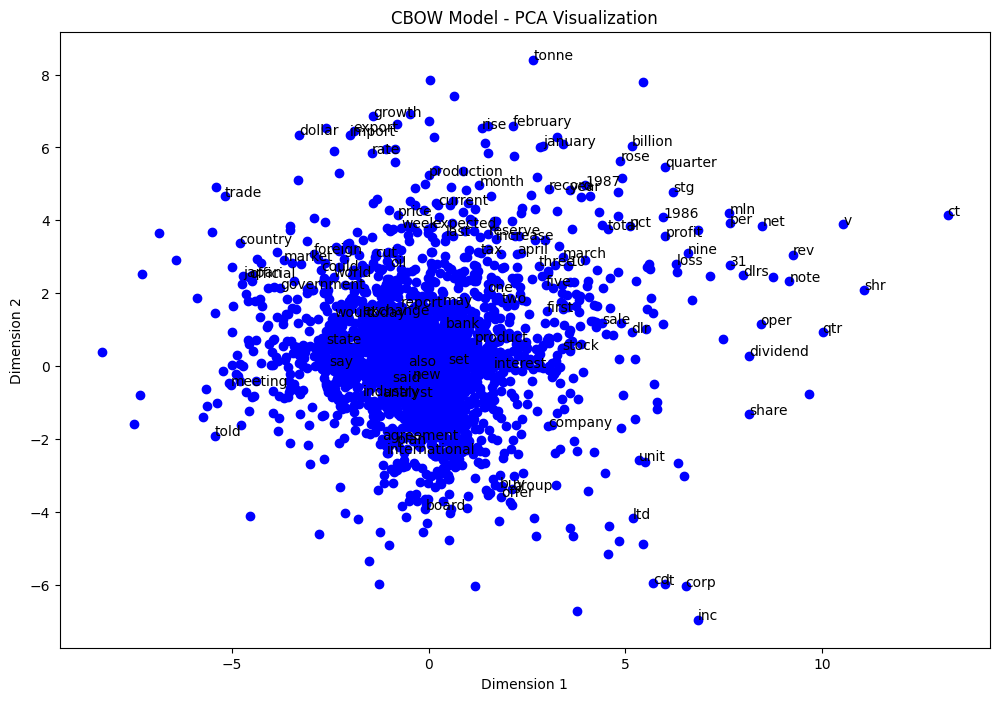

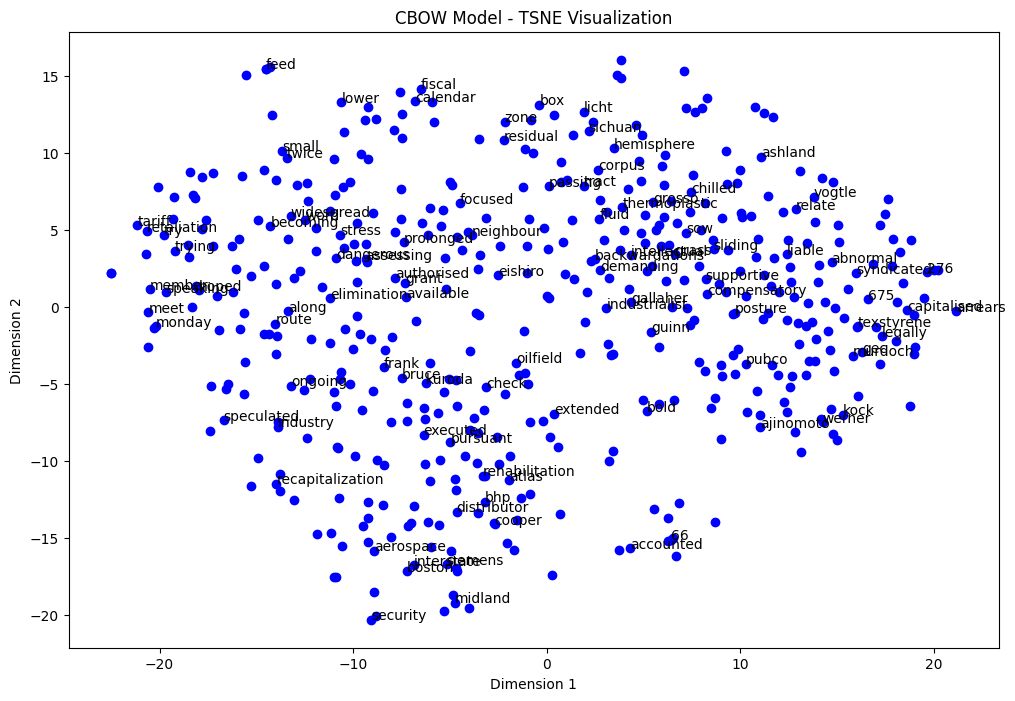

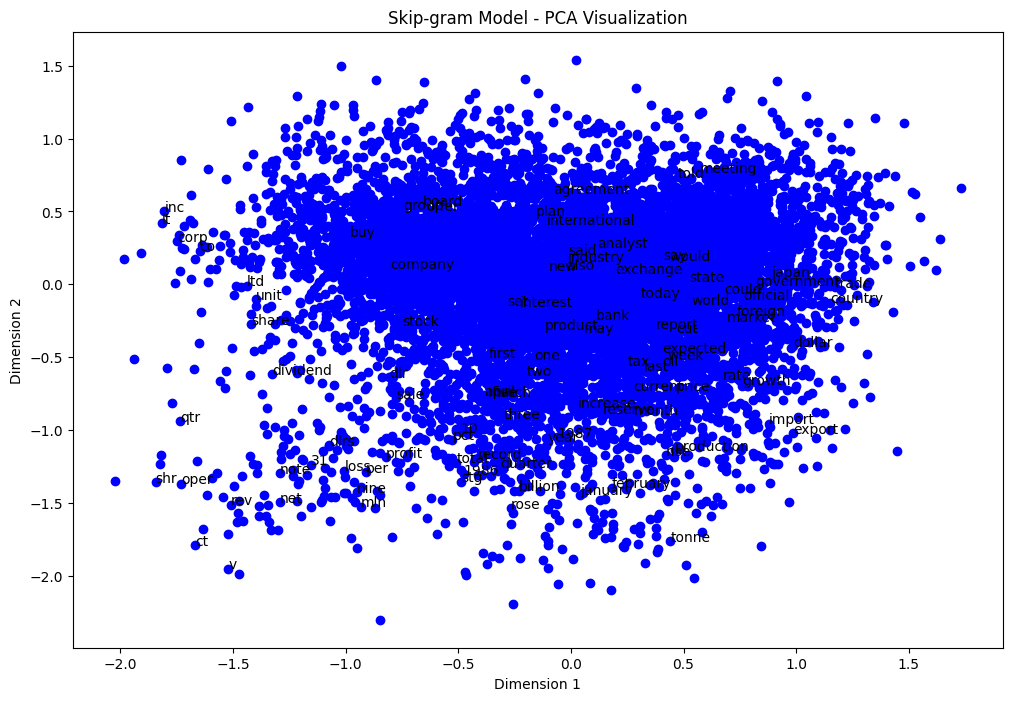

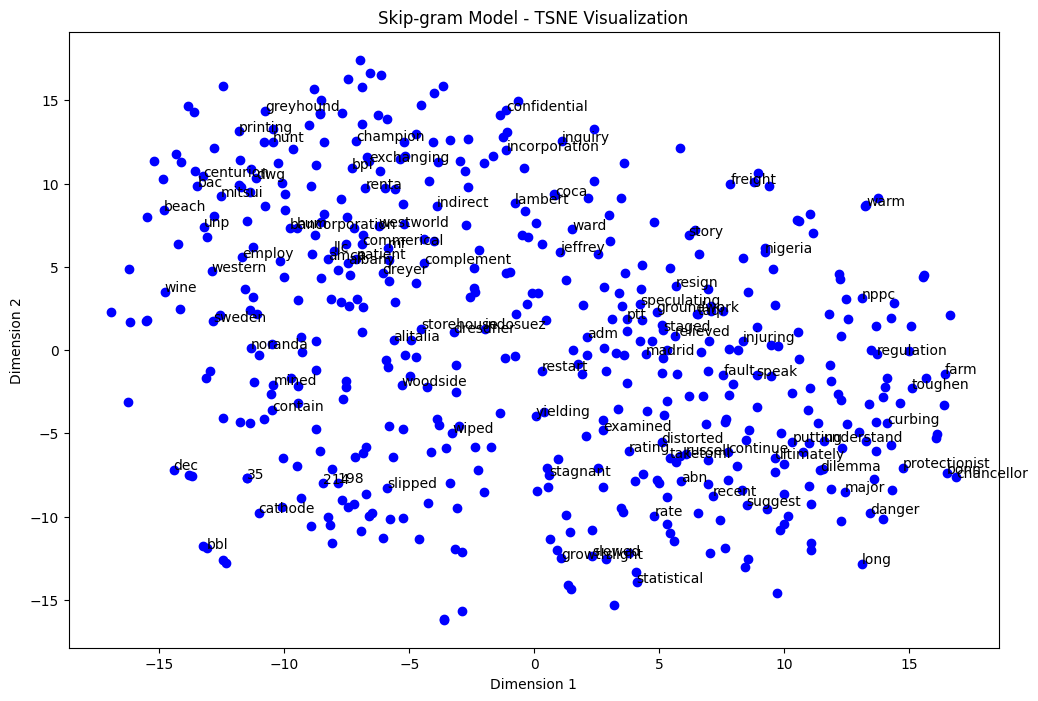

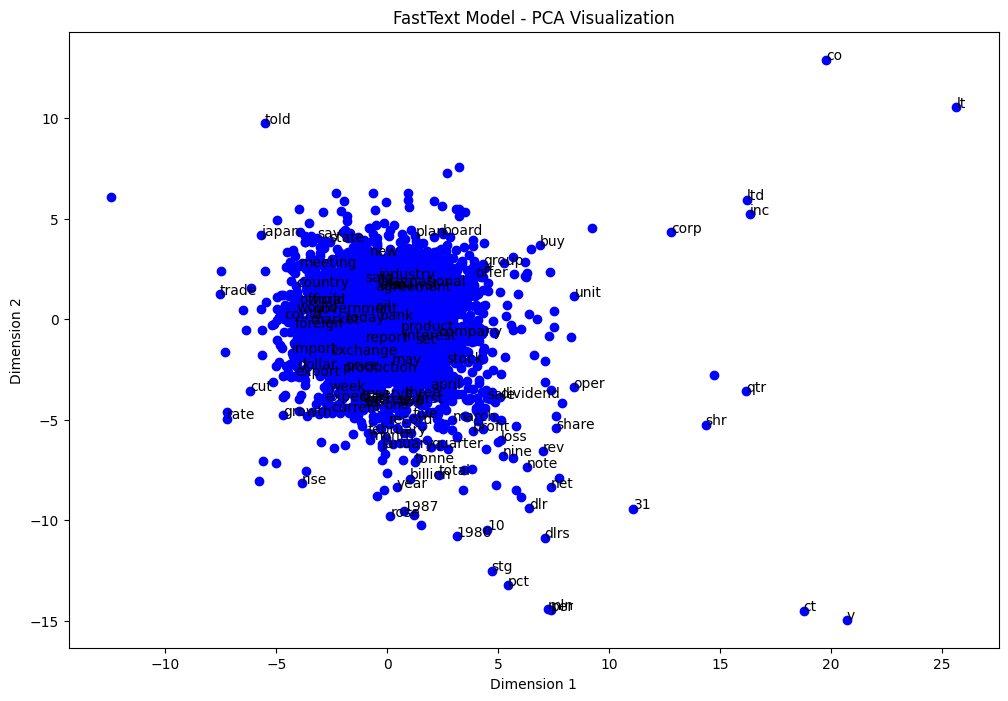

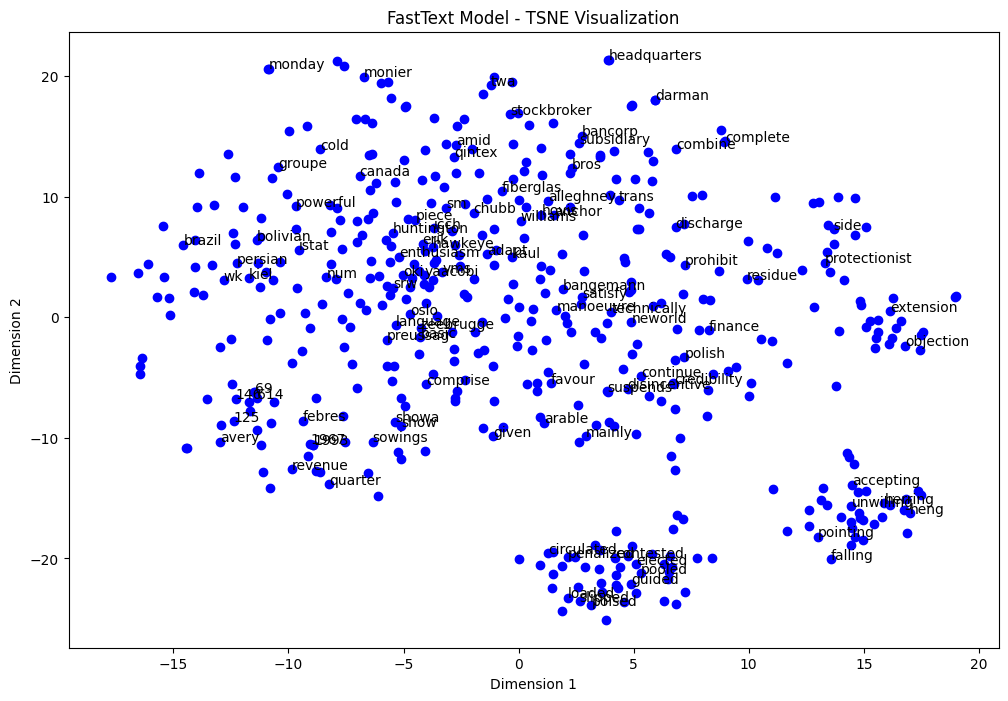

In [3]:
import nltk
import gensim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from gensim.models import Word2Vec, FastText
from nltk.corpus import reuters
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import os

# Ensure required resources are downloaded and available
def download_nltk_resources():
    nltk_path = os.path.join(os.getcwd(), 'nltk_data')
    os.makedirs(nltk_path, exist_ok=True)

    if nltk_path not in nltk.data.path:
        nltk.data.path.append(nltk_path)

    resources = ["reuters", "punkt", "stopwords", "wordnet", "punkt_tab"]

    for resource in resources:
        try:
            nltk.data.find(f"corpora/{resource}")
            print(f"{resource} already present.")
        except LookupError:
            print(f"Downloading {resource}...")
            nltk.download(resource, download_dir=nltk_path)

    # Ensure 'punkt' tokenizer is available
    try:
        nltk.data.find('tokenizers/punkt')
        print("punkt tokenizer already present.")
    except LookupError:
        print("Downloading punkt tokenizer...")
        nltk.download('punkt', download_dir=nltk_path)

    # Force reload after download
    nltk.data.path.append(nltk_path)

    # Validate resource availability
    for resource in resources:
        try:
            nltk.data.find(f"corpora/{resource}")
            print(f"{resource} successfully loaded.")
        except LookupError:
            print(f"Error: {resource} not found.")

    # Print current NLTK paths for debugging
    print("Current NLTK paths:", nltk.data.path)

download_nltk_resources()

# Preprocess the corpus
def preprocess_corpus(corpus):
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

    processed_corpus = []
    for doc_id in corpus.fileids():
        tokens = word_tokenize(corpus.raw(doc_id).lower())
        tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum() and word not in stop_words]
        if tokens:  # Avoid empty documents
            processed_corpus.append(tokens)

    return processed_corpus

# Train Word2Vec or FastText model
def train_model(corpus, model_type="word2vec", sg=0, vector_size=100, window=5, min_count=5, workers=4):
    model_cls = Word2Vec if model_type == "word2vec" else FastText
    model = model_cls(sentences=corpus, vector_size=vector_size, window=window, min_count=min_count, sg=sg, workers=workers)
    return model

# Reduce dimensionality with PCA or t-SNE
def reduce_dimensions(model, method='pca', n_components=2, sample_size=500):
    words = model.wv.index_to_key

    # Limit word vectors to sample_size for TSNE performance
    if method == 'tsne' and len(words) > sample_size:
        words = np.random.choice(words, size=sample_size, replace=False)

    word_vectors = np.array([model.wv[word] for word in words])

    reducer = PCA(n_components=n_components) if method == 'pca' else TSNE(n_components=n_components, random_state=42, perplexity=30)
    reduced_vectors = reducer.fit_transform(word_vectors)

    return words, reduced_vectors

# Visualize embeddings
def plot_embeddings(words, vectors, title="Word Embeddings Visualization"):
    plt.figure(figsize=(12, 8))
    plt.scatter(vectors[:, 0], vectors[:, 1], marker='o', color='blue')
    for i, word in enumerate(words[:100]):
        plt.annotate(word, xy=(vectors[i, 0], vectors[i, 1]))

    plt.title(title)
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Main function to run the analysis
def main():
    corpus = reuters
    processed_corpus = preprocess_corpus(corpus)

    # Train models
    cbow_model = train_model(processed_corpus, model_type="word2vec", sg=0)
    skipgram_model = train_model(processed_corpus, model_type="word2vec", sg=1)
    fasttext_model = train_model(processed_corpus, model_type="fasttext")

    # Visualize embeddings
    for model, name in [(cbow_model, "CBOW"), (skipgram_model, "Skip-gram"), (fasttext_model, "FastText")]:
        for method in ['pca', 'tsne']:
            words, vectors = reduce_dimensions(model, method=method)
            plot_embeddings(words, vectors, title=f"{name} Model - {method.upper()} Visualization")

if __name__ == "__main__":
    main()


In [5]:
pip install numpy==1.23.5 scipy==1.9.3 gensim==4.3.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.4/33.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 65.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.3
    Uninstalling gensim-4.3.3:
      Successfully uninstalled gensim-4.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 